<a id='TopPage'></a>
## Full EDA

#### Contents:

- Imports
    - [Module Imports](#LImports)
    - [Data Import](#DImports)
- EDA
    - [Describe](#Describe)
    - [Column Headers](#Columns)
    - [Standardised Boxplot](#StdBxPlt)
    - [Heatmap](#Heatmap)
    - [Pairplot](#Pairplot)
    - WordClouds:
        - [Wordcloud NTA](#Wordcloud1)
        - [Wordcloud YTA](#Wordcloud2)
    - [Top Unique Words per Class](#TopWC)


<a id='LImports'></a>
**Module Imports:**

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from wordcloud import WordCloud,STOPWORDS

from sklearn.preprocessing import StandardScaler

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='DImports'></a>
**Data Imports:**

In [169]:
reddit_data = pd.read_json('Vadered_Data')

<a id='Describe'></a>
**Describe:**

In [170]:
reddit_data.describe()

created_utc     gildings  num_comments  retrieved_on         score  \
count  5.693000e+03  5693.000000   5693.000000  5.693000e+03   5693.000000   
mean   1.557230e+12     0.019673     76.110838  1.557230e+12    209.127349   
std    7.235260e+08     0.240708    303.960130  7.235400e+08   1409.978564   
min    1.555953e+12     0.000000      3.000000  1.555953e+12      0.000000   
25%    1.556613e+12     0.000000     15.000000  1.556613e+12      1.000000   
50%    1.557254e+12     0.000000     24.000000  1.557257e+12      3.000000   
75%    1.557859e+12     0.000000     44.000000  1.557859e+12     12.000000   
max    1.558453e+12     8.000000   8625.000000  1.558453e+12  30349.000000   

        updated_utc          wls  vader_compound    vader_neg    vader_neu  \
count  5.693000e+03  5693.000000     5693.000000  5693.000000  5693.000000   
mean   1.557427e+12     5.989988        0.007301     0.097219     0.803396   
std    7.220199e+08     0.173037        0.829929     0.048631     0.066185   
min    1.556040e+12     3.000000       -0.999300     0.000000     0.490000   
25%    1.556699e+12     6.000000       -0.903000     0.063000     0.762000   
50%    1.557624e+12     6.000000        0.000000     0.092000     0.805000   
75%    1.557945e+12     6.000000        0.912500     0.126000     0.850000   
max    1.558539e+12     6.000000        0.999100     0.419000     1.000000   

       ...      hour_21      hour_22      hour_23       hour_3       hour_4  \
count  ...  5693.000000  5693.000000  5693.000000  5693.000000  5693.000000   
mean   ...     0.043211     0.043211     0.043211     0.037239     0.039171   
std    ...     0.203350     0.203350     0.203350     0.189363     0.194018   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
75%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

            hour_5       hour_6       hour_7       hour_8       hour_9  
count  5693.000000  5693.000000  5693.000000  5693.000000  5693.000000  
mean      0.040225     0.036536     0.040225     0.038644     0.036536  
std       0.196503     0.187636     0.196503     0.192762     0.187636  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 37 columns]

<a id='Columns'></a>
**Column Headers:**

In [6]:
reddit_data.columns

Index(['created_utc', 'gildings', 'is_crosspostable', 'is_robot_indexable',
       'no_follow', 'num_comments', 'over_18', 'retrieved_on', 'score',
       'selftext', 'send_replies', 'updated_utc', 'wls', 'Ass', 'Ass2', 'y',
       'vader_compound', 'vader_neg', 'vader_neu', 'vader_pos', 'quote_len',
       'family?', 'hour_0', 'hour_1', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_2', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9'],
      dtype='object')

<a id='StdBxPlt'></a>
**Boxplot:**

In [7]:
scaler = StandardScaler()

red_std = pd.DataFrame(scaler.fit_transform(reddit_data[reddit_data.describe().columns]),columns=reddit_data.describe().columns) 

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


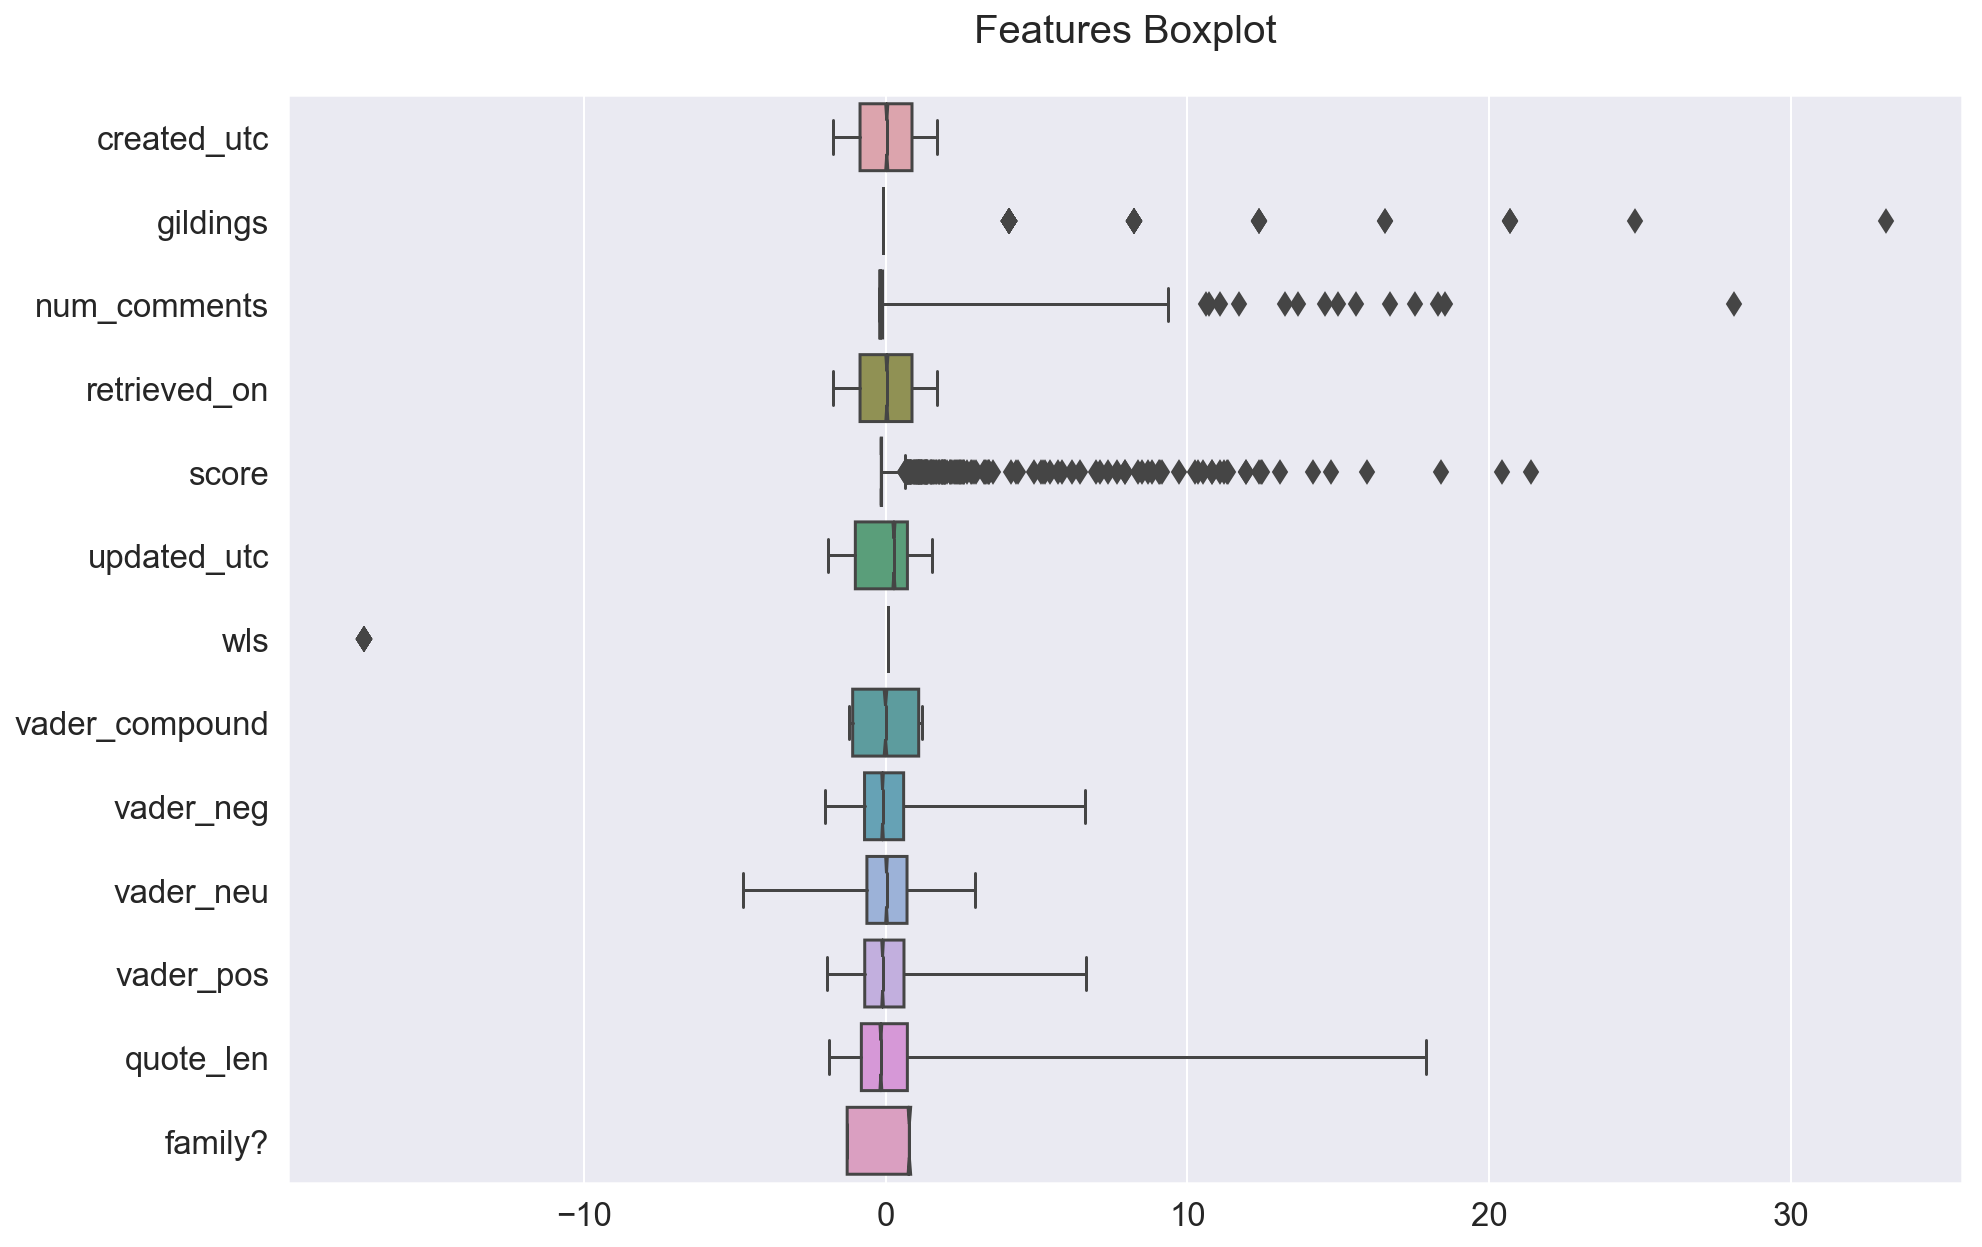

In [171]:
fig,ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=red_std[[i for i in red_std.columns if 'hour' not in i]], orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax, whis=100)

ax.set_title('Features Boxplot\n', fontsize=20)

plt.show()

In [172]:
reddit_data[reddit_data.columns[['hour' not in i for i in reddit_data.columns]]].corr()

created_utc      gildings  is_crosspostable  \
created_utc            1.000000 -5.013848e-03         -0.001808   
gildings              -0.005014  1.000000e+00          0.001877   
is_crosspostable      -0.001808  1.876847e-03          1.000000   
is_robot_indexable    -0.001808  1.876847e-03          1.000000   
no_follow             -0.020979  4.058377e-03         -0.001140   
num_comments           0.021830  6.337326e-01          0.005322   
over_18               -0.001408 -4.729949e-03          0.001329   
retrieved_on           1.000000 -5.015934e-03         -0.001882   
score                  0.016592  6.534836e-01          0.003395   
send_replies           0.007957 -1.160073e-02         -0.002487   
updated_utc            0.971638  2.524888e-07         -0.006418   
wls                    0.001408  4.729949e-03         -0.001329   
vader_compound         0.003257 -1.982024e-02          0.000202   
vader_neg             -0.000779  1.138320e-02          0.045907   
vader_neu             -0.007796 -1.407528e-02         -0.068214   
vader_pos              0.010887  7.543015e-03          0.044971   
quote_len              0.001370  5.218570e-02          0.042999   
family?               -0.002587  1.425114e-02          0.029377   

                    is_robot_indexable  no_follow  num_comments   over_18  \
created_utc                  -0.001808  -0.020979      0.021830 -0.001408   
gildings                      0.001877   0.004058      0.633733 -0.004730   
is_crosspostable              1.000000  -0.001140      0.005322  0.001329   
is_robot_indexable            1.000000  -0.001140      0.005322  0.001329   
no_follow                    -0.001140   1.000000      0.006623  0.002873   
num_comments                  0.005322   0.006623      1.000000 -0.008859   
over_18                       0.001329   0.002873     -0.008859  1.000000   
retrieved_on                 -0.001882  -0.021064      0.021830 -0.001411   
score                         0.003395   0.006847      0.894729 -0.008389   
send_replies                 -0.002487  -0.005377     -0.002293  0.006267   
updated_utc                  -0.006418  -0.023257      0.021150  0.000612   
wls                          -0.001329  -0.002873      0.008859 -1.000000   
vader_compound                0.000202  -0.008640     -0.019452  0.004429   
vader_neg                     0.045907   0.015758     -0.004766  0.005940   
vader_neu                    -0.068214  -0.015083      0.012133 -0.013784   
vader_pos                     0.044971   0.004713     -0.011142  0.012341   
quote_len                     0.042999   0.007100      0.040343  0.010398   
family?                       0.029377  -0.002261      0.034404  0.001290   

                    retrieved_on     score  send_replies   updated_utc  \
created_utc             1.000000  0.016592      0.007957  9.716385e-01   
gildings               -0.005016  0.653484     -0.011601  2.524888e-07   
is_crosspostable       -0.001882  0.003395     -0.002487 -6.417632e-03   
is_robot_indexable     -0.001882  0.003395     -0.002487 -6.417632e-03   
no_follow              -0.021064  0.006847     -0.005377 -2.325728e-02   
num_comments            0.021830  0.894729     -0.002293  2.115023e-02   
over_18                -0.001411 -0.008389      0.006267  6.118834e-04   
retrieved_on            1.000000  0.016592      0.007961  9.716416e-01   
score                   0.016592  1.000000     -0.012457  1.720722e-02   
send_replies            0.007961 -0.012457      1.000000  6.850152e-03   
updated_utc             0.971642  0.017207      0.006850  1.000000e+00   
wls                     0.001411  0.008389     -0.006267 -6.118834e-04   
vader_compound          0.003260 -0.028018     -0.006531  5.401384e-03   
vader_neg              -0.000783  0.004955      0.001298 -3.443312e-03   
vader_neu              -0.007794  0.009909     -0.001782 -6.601699e-03   
vader_pos               0.010887 -0.017584      0.001152  1.188796e-02   
quote_len               

<a id='Heatmap'></a>
**Heatmap:**

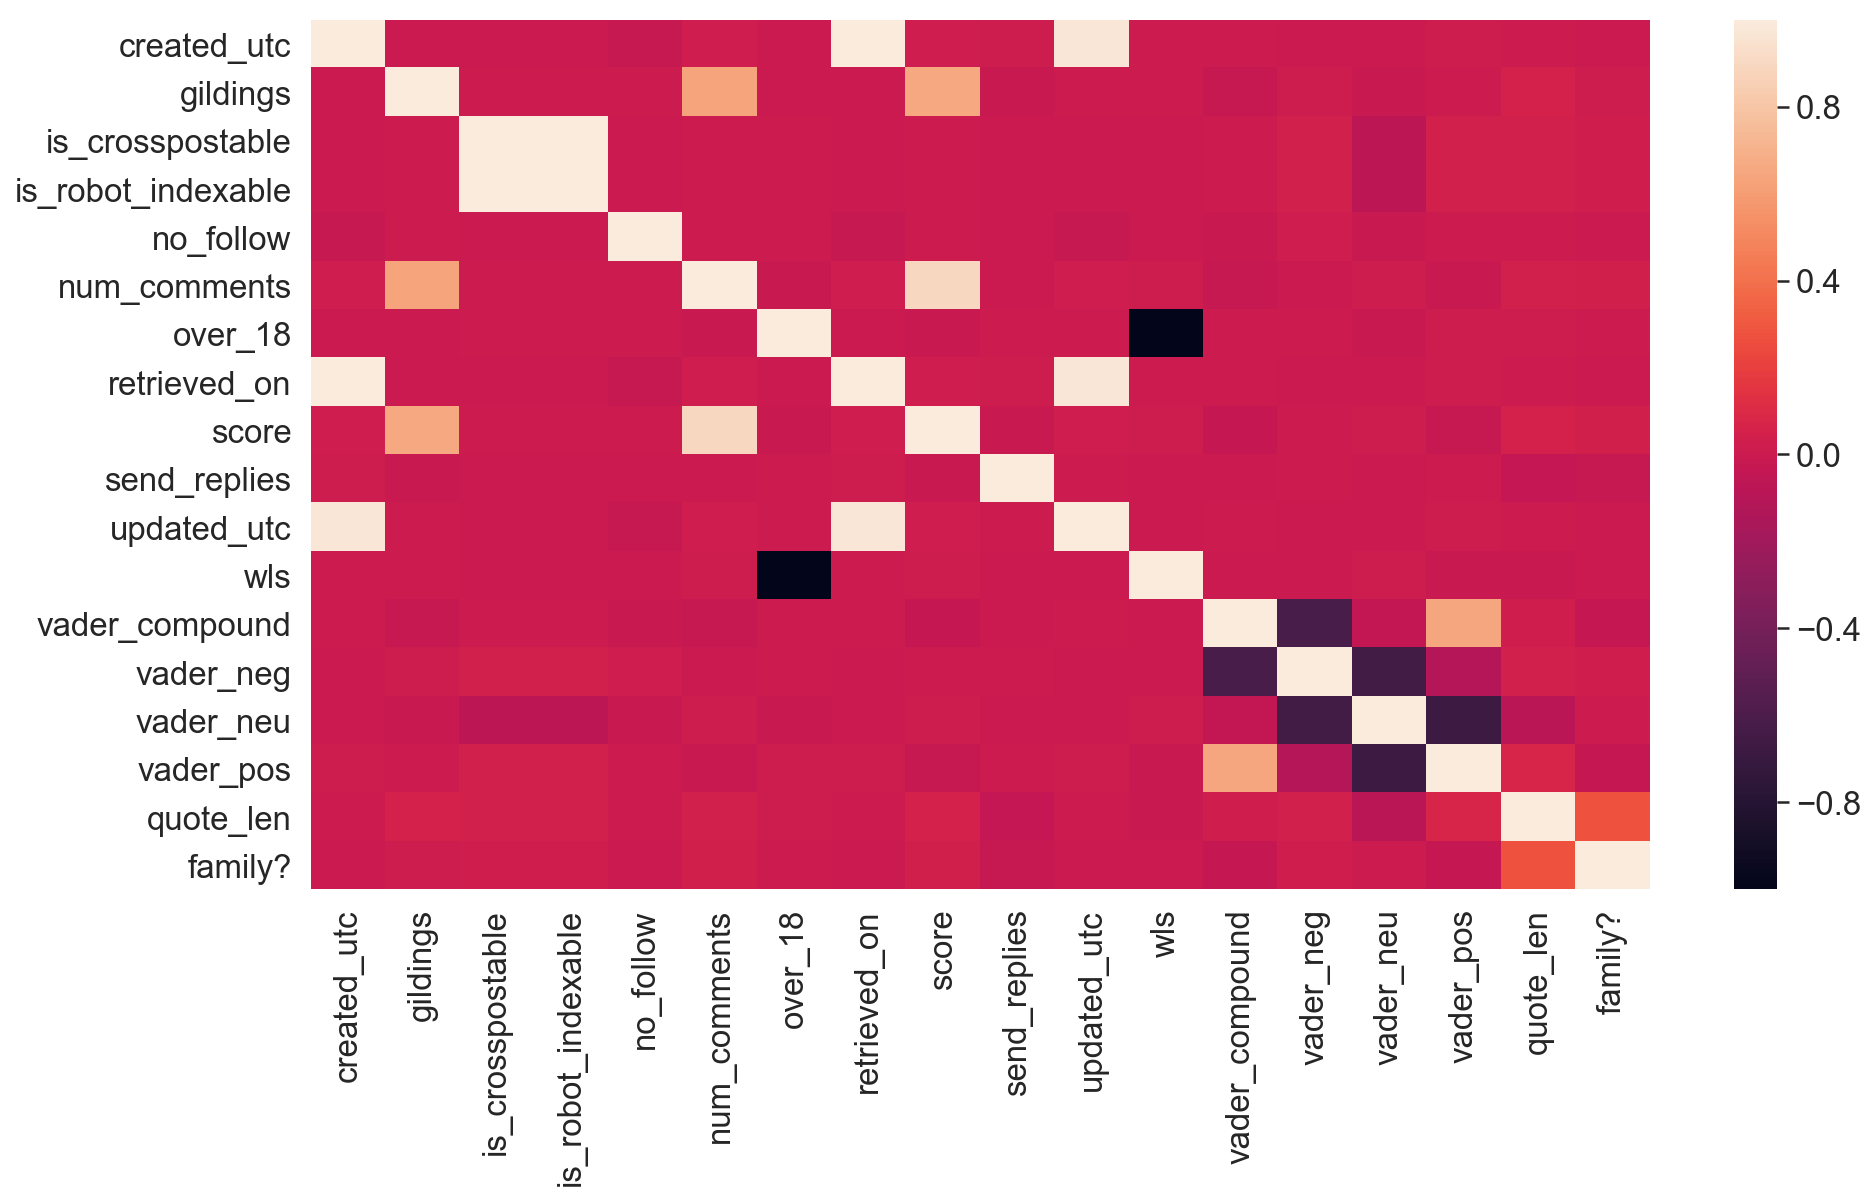

In [173]:
fig = plt.figure(figsize = [15,8])
sns.heatmap(reddit_data[reddit_data.columns[['hour' not in i for i in reddit_data.columns]]].corr());

<a id='Pairplot'></a>
**Pairplot:**

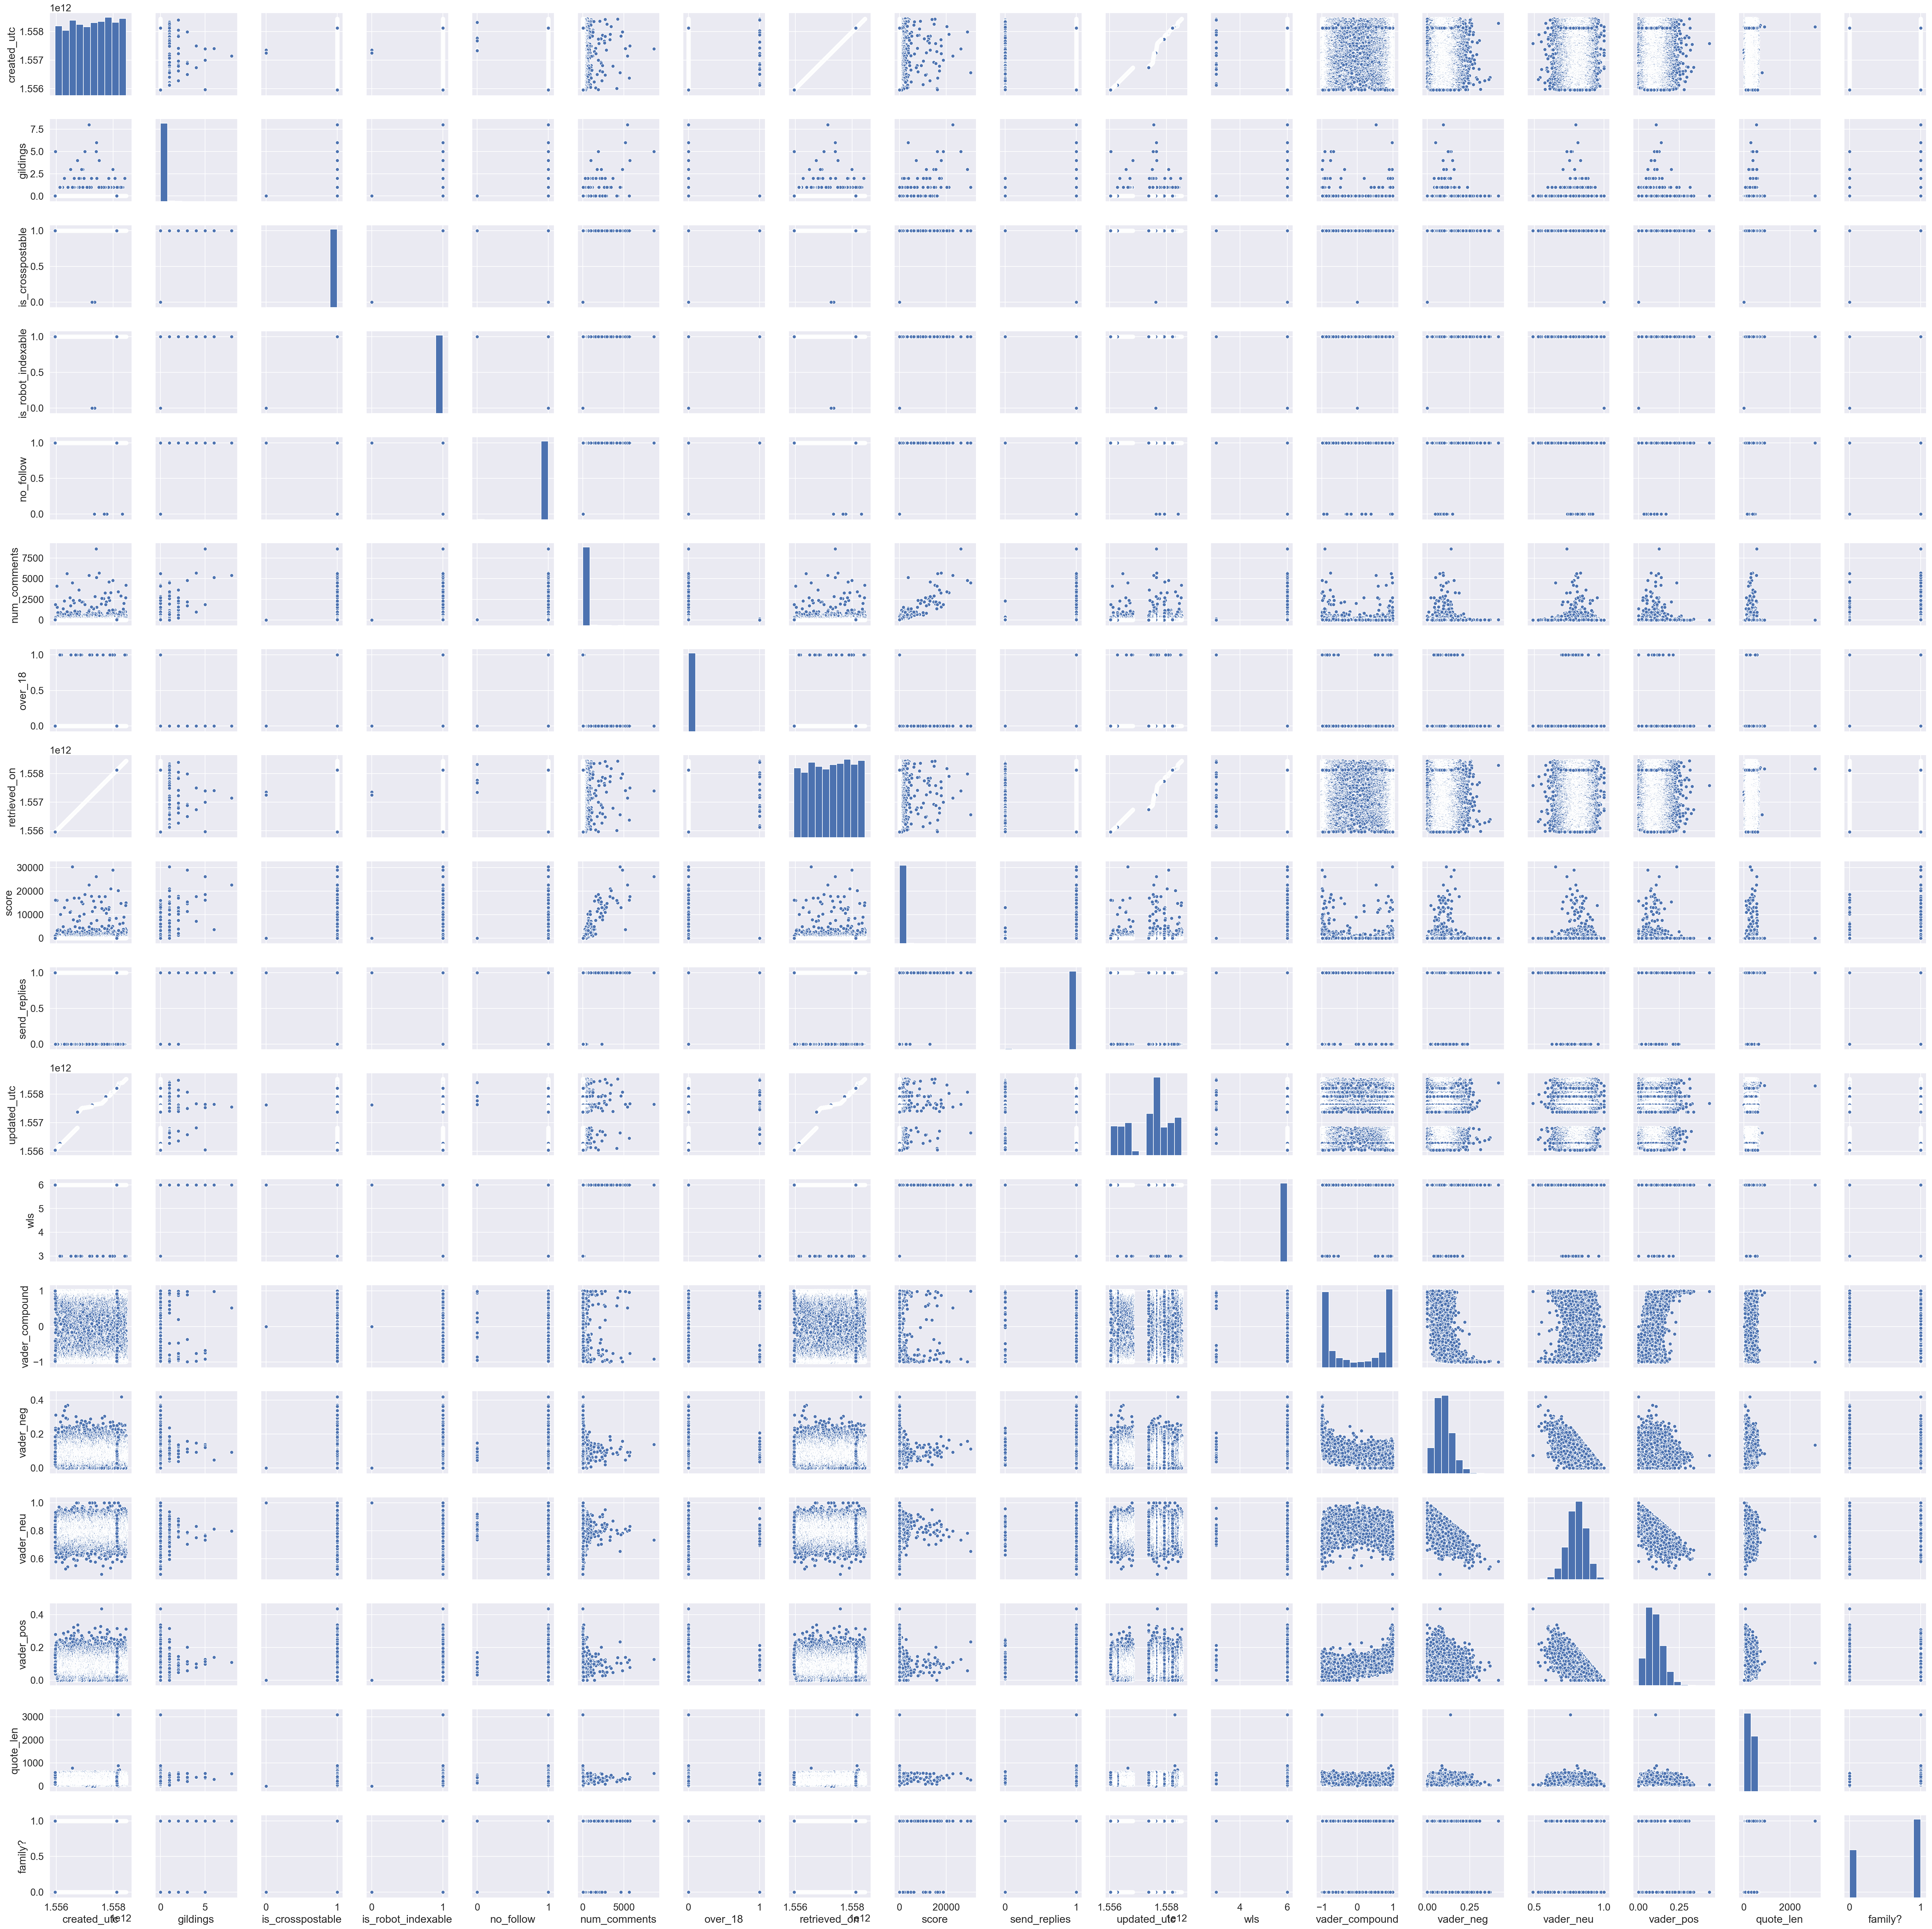

In [147]:
sns.pairplot(reddit_data[reddit_data[reddit_data.columns[['hour' not in i for i in\
                                                          reddit_data.columns]]].corr().columns].astype(float));

In [12]:
reddit_data.columns[['hour' not in i for i in reddit_data.columns]]

Index(['created_utc', 'gildings', 'is_crosspostable', 'is_robot_indexable',
       'no_follow', 'num_comments', 'over_18', 'retrieved_on', 'score',
       'selftext', 'send_replies', 'updated_utc', 'wls', 'Ass', 'Ass2', 'y',
       'vader_compound', 'vader_neg', 'vader_neu', 'vader_pos', 'quote_len',
       'family?'],
      dtype='object')

<a id='Wordcloud1'></a>
**Wordcloud for NTA:**

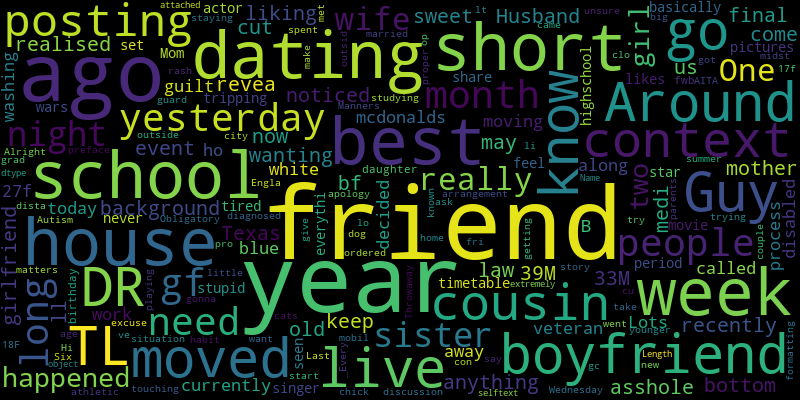

<Figure size 1152x864 with 0 Axes>

In [174]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(16, 12))
a = wordcloud.generate(str(reddit_data['selftext'][reddit_data['y'] == 'NTA']))
a.to_image()

In [176]:
a = pd.DataFrame(a.words_,index=[0])

<a id='Wordcloud2'></a>
**Wordcloud for YTA:**

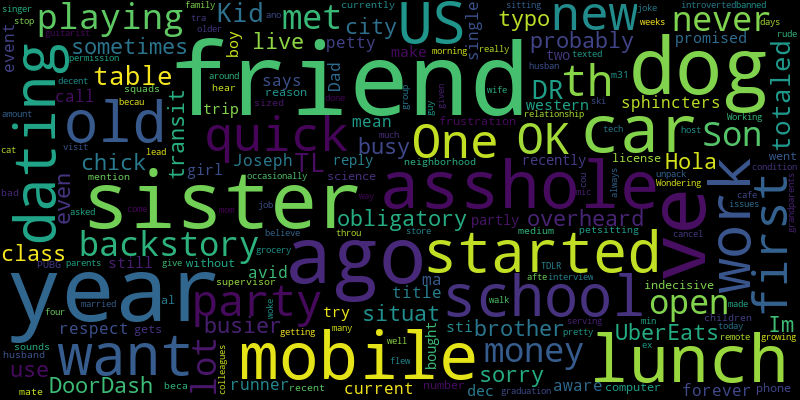

<Figure size 1152x864 with 0 Axes>

In [177]:
plt.figure(figsize=(16, 12))
b = wordcloud.generate(str(reddit_data['selftext'][reddit_data['y'] == 'YTA']))
b.to_image()

In [178]:
b = pd.DataFrame(b.words_,index=[0])

<a id='TopWC'></a>
**Top Unique Words For Each Class:**

In [179]:
c = pd.concat([a,b],sort=False,ignore_index=True)

c.fillna(-1,inplace=True)

for i in c.columns:
    if (c[i][0] != -1) and (c[i][1] != -1):
        c.drop(columns=[i],inplace=True)

c = c.applymap(lambda x:np.nan if x == -1 else x).T

print('Top ten words for class NTA:\n',list(c[c[0]>=0].sort_values(0,ascending=False).index[:10]),'\n\n')

print('Top ten words for class YTA:\n',list(c[c[1]>=0].sort_values(1,ascending=False).index[:10]))<a id='TopWC'></a>
**Top Unique Words For Each Class:**

Top ten words for class NTA:
 ['week', 'short', 'house', 'best', 'posting', 'happened', 'night', 'need', 'month', 'gf'] 


Top ten words for class YTA:
 ['lunch', 'th', 'car', 'Son', 'open', 'lot', 'backstory', 'OK', 'money', 'party']


- [Return to Top of Page](#TopPage)
- [Next Section](./Sub4_Vader_Sentiment.ipynb)